In [11]:
import pickle
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display_functions import display
from matplotlib import pyplot as plt

In [12]:
with open('out/all_sites_all_features_results.pickle', 'rb') as handle:
    df = pickle.load(handle)

df['brier_score'] = np.power(df['y'] - df['y_hat_prob'], 2)

,Arosa,Baulmes,Chrauchtal,Hornbach,Rappetal,Turbach,Urseren,Val_Cluozza,Val_D_Entremont,Val_Piora
0,0.206734,0.252492,0.254667,0.237209,0.259437,0.238728,0.252526,0.271683,0.252378,0.234035
1,0.205536,0.250516,0.254678,0.236985,0.259146,0.238611,0.252583,0.271942,0.252365,0.233549
2,0.205428,0.258555,0.254763,0.237151,0.258710,0.238409,0.252676,0.270973,0.252436,0.233511
3,0.206178,0.254336,0.254697,0.237792,0.259401,0.238479,0.252617,0.271753,0.252495,0.233820
4,0.205870,0.250139,0.254605,0.238139,0.258723,0.238786,0.252629,0.271672,0.252365,0.233580
...,...,...,...,...,...,...,...,...,...,...
495,0.206322,0.258744,0.254762,0.238091,0.259003,0.238593,0.252441,0.271619,0.252446,0.234168
496,0.205976,0.248244,0.254704,0.237699,0.259198,0.238517,0.252557,0.271591,0.252428,0.233642
497,0.205602,0.258046,0.254697,0.237593,0.259178,0.238610,0.252468,0.272158,0.252484,0.233559
498,0.205677,0.251540,0.254644,0.237407,0.259329,0.238356,0.252583,0.272507,0.252383,0.233851


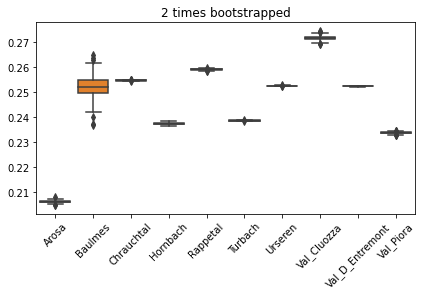

In [13]:
results = defaultdict(list)
for site  in pd.unique(df['site']):
    df_site = df[df['site'] == site]
    for i in range(500):
        results[site].append(df_site['brier_score'].sample(n=len(df_site), replace=True).mean())

results = pd.DataFrame.from_dict(results)
display(results)

ax = sns.boxplot(data=results)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.title("2 times bootstrapped")
plt.show()

Arosa 35820 340290
Baulmes 1040 9880
Chrauchtal 322920 3067740
Hornbach 17520 166440
Rappetal 40920 388740
Turbach 120400 1143800
Urseren 148080 1406760
Val_Cluozza 7040 66880
Val_D_Entremont 72700 690650
Val_Piora 44360 421420


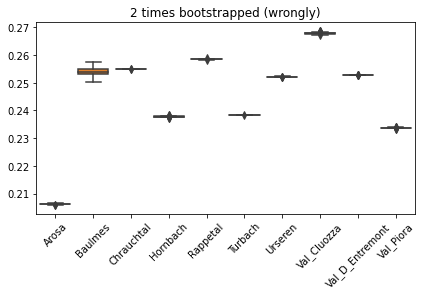

In [14]:
results = defaultdict(list)
for site  in pd.unique(df['site']):
    df_site = df[df['site'] == site]
    df_site_wrong = pd.concat(df_site[df_site['bootstrap_run_number'] == i] for i in range(20) for j in range(20 - i) )
    print(site, len(df_site), len(df_site_wrong))
    for i in range(500):
        results[site].append(df_site_wrong['brier_score'].sample(n=len(df_site_wrong), replace=True).mean())

results = pd.DataFrame.from_dict(results)

ax = sns.boxplot(data=results)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.title("2 times bootstrapped (wrongly)")
plt.show()

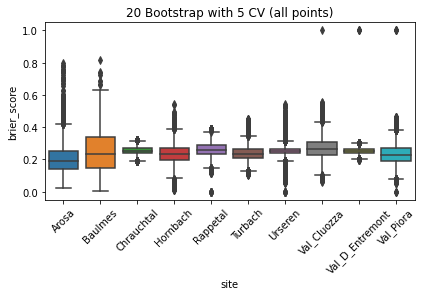

In [15]:
ax = sns.boxplot(data=df, x='site', y='brier_score')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.title("20 Bootstrap with 5 CV (all points)")
plt.show()

Mean brier scores across site and bootstrap run (810800 to 200)


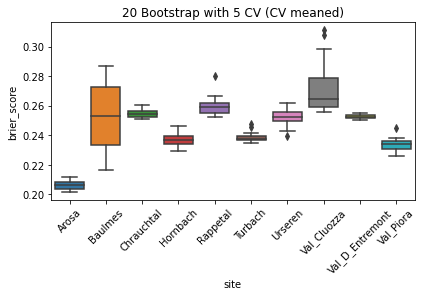

In [16]:
df_group_mean = df.groupby(['site', 'bootstrap_run_number']).mean().reset_index(drop=False)

print(f"Mean brier scores across site and bootstrap run ({len(df)} to {len(df_group_mean)})")

ax = sns.boxplot(data=df_group_mean, x='site', y='brier_score')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.title("20 Bootstrap with 5 CV (CV meaned)")
plt.show()